In [34]:
#import some libraries

import pyodbc
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
from sqlalchemy import create_engine, MetaData, Table, select
import seaborn as sns
import sklearn
import nltk
from nltk import word_tokenize
import spacy
# nltk.download()
#import rpy2
import Levenshtein
import en_core_web_sm  # or any other model you downloaded via spacy download or pip
nlp = en_core_web_sm.load()
from sklearn.cluster import KMeans

# Enable inline plotting
%matplotlib inline

#Import and assign WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

In [3]:
rpsg_msqi = (pd.DataFrame.from_csv('rpsg_msqi_text.csv'))

In [4]:
rpsg_msqi.head()

,Time Started,Date Submitted,Status,Activity date,Your name,School DBN,"Coach teachers and/or administrators:What activities did you do at [question('value'), id='479'] on [question('value'), id='2']?","Host or attend an intervisitation, showcase, or LPP-related event:What activities did you do at [question('value'), id='479'] on [question('value'), id='2']?","Planning future work while at school:What activities did you do at [question('value'), id='479'] on [question('value'), id='2']?","Shadowing:What activities did you do at [question('value'), id='479'] on [question('value'), id='2']?",...,Can you share any equity related stories about your work today?,"Is there anything else you would like us to know about your work on [question(""value""), id=""2""]?",Do you have any concerns you would like to flag for your supervisor?,Do you have any concerns you would like to flag for your supervisor? - Text Analysis:Do you have any concerns you would like to flag for your supervisor?,Your Name,Your email,Supervisor,Supervisor's email,Pod,Concern Flag
Response ID,,,,,,,,,,,,,,,,,,,,,
26,9/11/2017 10:43,9/11/2017 10:47,Complete,9/8/2017,Doctor McGougain,16K681,NaN,Host or attend an intervisitation,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,9/11/2017 11:54,9/11/2017 12:17,Complete,9/5/2017,Allan Feltes,10X368,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,9/11/2017 12:41,9/11/2017 12:51,Complete,9/6/2017,Allan Feltes,04M377,NaN,NaN,NaN,NaN,...,Shared the slide from roundtables of who is re...,Still trying to build capacity in the MSCI C w...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,9/11/2017 18:33,9/11/2017 18:43,Complete,9/11/2017,Scott Moore,29Q238,Coach teachers and/or administrators,NaN,NaN,NaN,...,One of the teachers I am working closely with ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,9/11/2017 19:15,9/11/2017 19:18,Complete,9/11/2017,Sabrina Romano,11X287,NaN,NaN,NaN,NaN,...,Worked on planning for the first six weeks of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
list(rpsg_msqi.columns.values)

['Time Started',
 'Date Submitted',
 'Status',
 'Activity date',
 'Your name',
 'School DBN',
 "Coach teachers and/or administrators:What activities did you do at [question('value'), id='479']\xa0on [question('value'), id='2']?",
 "Host or attend an intervisitation, showcase, or LPP-related event:What activities did you do at [question('value'), id='479']\xa0on [question('value'), id='2']?",
 "Planning future work while at school:What activities did you do at [question('value'), id='479']\xa0on [question('value'), id='2']?",
 "Shadowing:What activities did you do at [question('value'), id='479']\xa0on [question('value'), id='2']?",
 "Supervisory visit:What activities did you do at [question('value'), id='479']\xa0on [question('value'), id='2']?",
 "Other:What activities did you do at [question('value'), id='479']\xa0on [question('value'), id='2']?",
 "Other:What activities did you do at [question('value'), id='479']\xa0on [question('value'), id='2']?.1",
 'Was this a full-day or half-d

In [27]:
filtered_rpsg_msqi = rpsg_msqi[rpsg_msqi['School DBN'].notnull()]
filtered_rpsg_msqi = rpsg_msqi[rpsg_msqi['Your name'].notnull()]
filtered_rpsg_msqi = rpsg_msqi[rpsg_msqi['Status'] == 'Complete']
filtered_rpsg_msqi = rpsg_msqi[rpsg_msqi['Concern Flag'] == 'Yes']

In [28]:
filtered_rpsg_msqi.describe()

,"Planning future work while at school:What activities did you do at [question('value'), id='479'] on [question('value'), id='2']?",Time Spent on Coaching Visit Activities Page,"N/A:If you worked with school leaders, which leaders? If not, enter N/A","STARI:Which of MSQI's supplemental programs did you support on [question('value'), id='2']? Enter ""N/A"" if no supplemental programs were supported.","Word Generation:Which of MSQI's supplemental programs did you support on [question('value'), id='2']? Enter ""N/A"" if no supplemental programs were supported.","N/A:Which of MSQI's supplemental programs did you support on [question('value'), id='2']? Enter ""N/A"" if no supplemental programs were supported.",Do you have any concerns you would like to flag for your supervisor? - Text Analysis:Do you have any concerns you would like to flag for your supervisor?
count,0.0,11.000000,0.0,0.0,0.0,0.0,0.0
mean,NaN,2468.545455,NaN,NaN,NaN,NaN,NaN
std,NaN,4181.475538,NaN,NaN,NaN,NaN,NaN
min,NaN,34.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,367.500000,NaN,NaN,NaN,NaN,NaN
50%,NaN,1037.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2039.500000,NaN,NaN,NaN,NaN,NaN
max,NaN,14538.000000,NaN,NaN,NaN,NaN,NaN


In [29]:
#Set up spaCy
import spacy
import en_core_web_sm  # or any other model you downloaded via spacy download or pip
nlp = en_core_web_sm.load()
from spacy.en import English
parser = English()
from spacy.en.word_sets import STOP_WORDS

In [30]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
from spacy.parts_of_speech import PROPN

def is_proper_noun(token):
    if token.doc.is_tagged is False:  # check if the document was POS-tagged
        raise ValueError('token is not POS-tagged')

    return token.pos == PROPN

In [43]:
tokens = []
lemma = []
pos = []

for doc in nlp.pipe(filtered_rpsg_msqi['Do you have any concerns you would like to flag for your supervisor?'].astype('unicode').values, batch_size=11,
                        n_threads=3):
    if doc.is_parsed:
        tokens.append([n.text for n in doc if not n.is_punct and not n.is_stop and not n.is_space and not n.like_url and not is_proper_noun(n) and n.is_alpha])
        lemma.append([n.lemma_ for n in doc if not n.is_punct and not n.is_stop and not n.is_space and not n.like_url and not is_proper_noun(n) and n.is_alpha])
        pos.append([n.pos_ for n in doc if not n.is_punct and not n.is_stop and not n.is_space and not n.like_url and not is_proper_noun(n) and n.is_alpha])
    else:
        # We want to make sure that the lists of parsed results have the
        # same number of entries of the original Dataframe, so add some blanks in case the parse fails
        tokens.append(None)
        lemma.append(None)
        pos.append(None)

filtered_rpsg_msqi['s_tokens_concerns'] = tokens
filtered_rpsg_msqi['s_lemmas_concerns'] = lemma 
filtered_rpsg_msqi['s_pos_concerns'] = pos

filtered_rpsg_msqi.head()

C:\Users\egagne\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\egagne\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\egagne\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,Time Started,Date Submitted,Status,Activity date,Your name,School DBN,"Coach teachers and/or administrators:What activities did you do at [question('value'), id='479'] on [question('value'), id='2']?","Host or attend an intervisitation, showcase, or LPP-related event:What activities did you do at [question('value'), id='479'] on [question('value'), id='2']?","Planning future work while at school:What activities did you do at [question('value'), id='479'] on [question('value'), id='2']?","Shadowing:What activities did you do at [question('value'), id='479'] on [question('value'), id='2']?",...,Do you have any concerns you would like to flag for your supervisor? - Text Analysis:Do you have any concerns you would like to flag for your supervisor?,Your Name,Your email,Supervisor,Supervisor's email,Pod,Concern Flag,s_tokens_concerns,s_lemmas_concerns,s_pos_concerns
Response ID,,,,,,,,,,,,,,,,,,,,,
74,9/14/2017 10:40,9/14/2017 10:54,Complete,9/13/2017,Sabrina Romano,05M148,NaN,NaN,NaN,NaN,...,NaN,Sabrina Romano,Sabrina Romano,Sabrina Romano,Sabrina Romano,Sabrina Romano,Yes,"[Concerns, school, difficult, schedule, coach,...","[concern, school, difficult, schedule, coach, ...","[NOUN, NOUN, ADJ, VERB, NOUN, VERB, NOUN, VERB..."
75,9/14/2017 11:46,9/14/2017 11:53,Complete,9/14/2017,Sabrina Romano,02M933,NaN,NaN,NaN,NaN,...,NaN,Sabrina Romano,Sabrina Romano,Sabrina Romano,Sabrina Romano,Sabrina Romano,Yes,"[Concerns, Administrative, contact, response, ...","[concern, administrative, contact, response, e...","[NOUN, ADJ, NOUN, NOUN, NOUN, VERB, ADJ, VERB,..."
87,9/14/2017 15:39,9/14/2017 15:40,Complete,8/31/2017,Allan Feltes,03M247,NaN,"Host or attend an intervisitation, showcase, o...",NaN,NaN,...,NaN,Allan Feltes,Allan Feltes,Allan Feltes,Allan Feltes,Allan Feltes,Yes,[test],[test],[NOUN]
93,9/15/2017 10:40,9/15/2017 11:08,Complete,9/12/2017,Allan Feltes,14K318,Coach teachers and/or administrators,NaN,NaN,NaN,...,NaN,Allan Feltes,Allan Feltes,Allan Feltes,Allan Feltes,Allan Feltes,Yes,"[wanted, pass, following, requests, observatio...","[want, pass, follow, request, observation, buy...","[VERB, VERB, VERB, NOUN, NOUN, VERB, NOUN, NOU..."
94,9/15/2017 11:11,9/15/2017 15:53,Complete,9/12/2017,Allan Feltes,75X186,Coach teachers and/or administrators,NaN,NaN,NaN,...,NaN,Allan Feltes,Allan Feltes,Allan Feltes,Allan Feltes,Allan Feltes,Yes,"[Principal, started, conversation, telling, jo...","[principal, start, conversation, tell, join, t...","[NOUN, VERB, NOUN, VERB, VERB, NOUN, NOUN, VER..."


In [38]:
vect = sklearn.feature_extraction.text.TfidfVectorizer()

In [44]:
lemmas = filtered_rpsg_msqi['s_lemmas_concerns'].apply(lambda x: ' '.join(x))
features = vect.fit_transform(lemmas)

feature_names = vect.get_feature_names()
dense = features.todense()
denselist = dense.tolist()

In [45]:
df = pd.DataFrame(denselist, columns=feature_names)
print(df)

      access    adjust  administer  administrative  afternoon  allocation  \
0   0.000000  0.000000    0.000000        0.000000   0.000000    0.000000   
1   0.000000  0.000000    0.000000        0.270053   0.000000    0.000000   
2   0.000000  0.000000    0.000000        0.000000   0.000000    0.000000   
3   0.000000  0.000000    0.000000        0.000000   0.000000    0.000000   
4   0.000000  0.123835    0.000000        0.000000   0.000000    0.000000   
5   0.000000  0.000000    0.000000        0.000000   0.000000    0.000000   
6   0.000000  0.000000    0.447554        0.000000   0.000000    0.000000   
7   0.000000  0.000000    0.000000        0.000000   0.000000    0.000000   
8   0.000000  0.000000    0.000000        0.000000   0.000000    0.000000   
9   0.000000  0.000000    0.000000        0.000000   0.000000    0.000000   
10  0.000000  0.000000    0.000000        0.000000   0.000000    0.000000   
11  0.000000  0.000000    0.000000        0.000000   0.000000    0.000000   

In [46]:
list(df.columns.values)

['access',
 'adjust',
 'administer',
 'administrative',
 'afternoon',
 'allocation',
 'allow',
 'announcement',
 'apart',
 'appreciate',
 'approach',
 'appropriate',
 'assessment',
 'asset',
 'attend',
 'believe',
 'book',
 'bring',
 'build',
 'buy',
 'capacity',
 'challenge',
 'challenging',
 'change',
 'coach',
 'come',
 'compromise',
 'concern',
 'concerned',
 'consistent',
 'contact',
 'content',
 'continue',
 'control',
 'conversation',
 'coordinator',
 'create',
 'datum',
 'day',
 'different',
 'difficult',
 'directive',
 'donate',
 'early',
 'effectively',
 'email',
 'experience',
 'express',
 'fact',
 'fail',
 'fall',
 'feeling',
 'figure',
 'follow',
 'forward',
 'fund',
 'gain',
 'gig',
 'go',
 'good',
 'gradually',
 'grow',
 'hard',
 'help',
 'implementation',
 'include',
 'indicate',
 'inherit',
 'instance',
 'instinct',
 'issue',
 'join',
 'jump',
 'kind',
 'know',
 'knowledge',
 'language',
 'lastly',
 'lead',
 'leadership',
 'learn',
 'leaving',
 'let',
 'like',
 'likely

In [47]:
km_model = KMeans(n_clusters=15)
km_model.fit(features)
labels = km_model.labels_
#print()

In [48]:
filtered_rpsg_msqi['kmarker'] = labels
filtered_rpsg_msqi.head()

C:\Users\egagne\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Time Started,Date Submitted,Status,Activity date,Your name,School DBN,"Coach teachers and/or administrators:What activities did you do at [question('value'), id='479'] on [question('value'), id='2']?","Host or attend an intervisitation, showcase, or LPP-related event:What activities did you do at [question('value'), id='479'] on [question('value'), id='2']?","Planning future work while at school:What activities did you do at [question('value'), id='479'] on [question('value'), id='2']?","Shadowing:What activities did you do at [question('value'), id='479'] on [question('value'), id='2']?",...,Your Name,Your email,Supervisor,Supervisor's email,Pod,Concern Flag,s_tokens_concerns,s_lemmas_concerns,s_pos_concerns,kmarker
Response ID,,,,,,,,,,,,,,,,,,,,,
74,9/14/2017 10:40,9/14/2017 10:54,Complete,9/13/2017,Sabrina Romano,05M148,NaN,NaN,NaN,NaN,...,Sabrina Romano,Sabrina Romano,Sabrina Romano,Sabrina Romano,Sabrina Romano,Yes,"[Concerns, school, difficult, schedule, coach,...","[concern, school, difficult, schedule, coach, ...","[NOUN, NOUN, ADJ, VERB, NOUN, VERB, NOUN, VERB...",2
75,9/14/2017 11:46,9/14/2017 11:53,Complete,9/14/2017,Sabrina Romano,02M933,NaN,NaN,NaN,NaN,...,Sabrina Romano,Sabrina Romano,Sabrina Romano,Sabrina Romano,Sabrina Romano,Yes,"[Concerns, Administrative, contact, response, ...","[concern, administrative, contact, response, e...","[NOUN, ADJ, NOUN, NOUN, NOUN, VERB, ADJ, VERB,...",7
87,9/14/2017 15:39,9/14/2017 15:40,Complete,8/31/2017,Allan Feltes,03M247,NaN,"Host or attend an intervisitation, showcase, o...",NaN,NaN,...,Allan Feltes,Allan Feltes,Allan Feltes,Allan Feltes,Allan Feltes,Yes,[test],[test],[NOUN],6
93,9/15/2017 10:40,9/15/2017 11:08,Complete,9/12/2017,Allan Feltes,14K318,Coach teachers and/or administrators,NaN,NaN,NaN,...,Allan Feltes,Allan Feltes,Allan Feltes,Allan Feltes,Allan Feltes,Yes,"[wanted, pass, following, requests, observatio...","[want, pass, follow, request, observation, buy...","[VERB, VERB, VERB, NOUN, NOUN, VERB, NOUN, NOU...",14
94,9/15/2017 11:11,9/15/2017 15:53,Complete,9/12/2017,Allan Feltes,75X186,Coach teachers and/or administrators,NaN,NaN,NaN,...,Allan Feltes,Allan Feltes,Allan Feltes,Allan Feltes,Allan Feltes,Yes,"[Principal, started, conversation, telling, jo...","[principal, start, conversation, tell, join, t...","[NOUN, VERB, NOUN, VERB, VERB, NOUN, NOUN, VER...",4


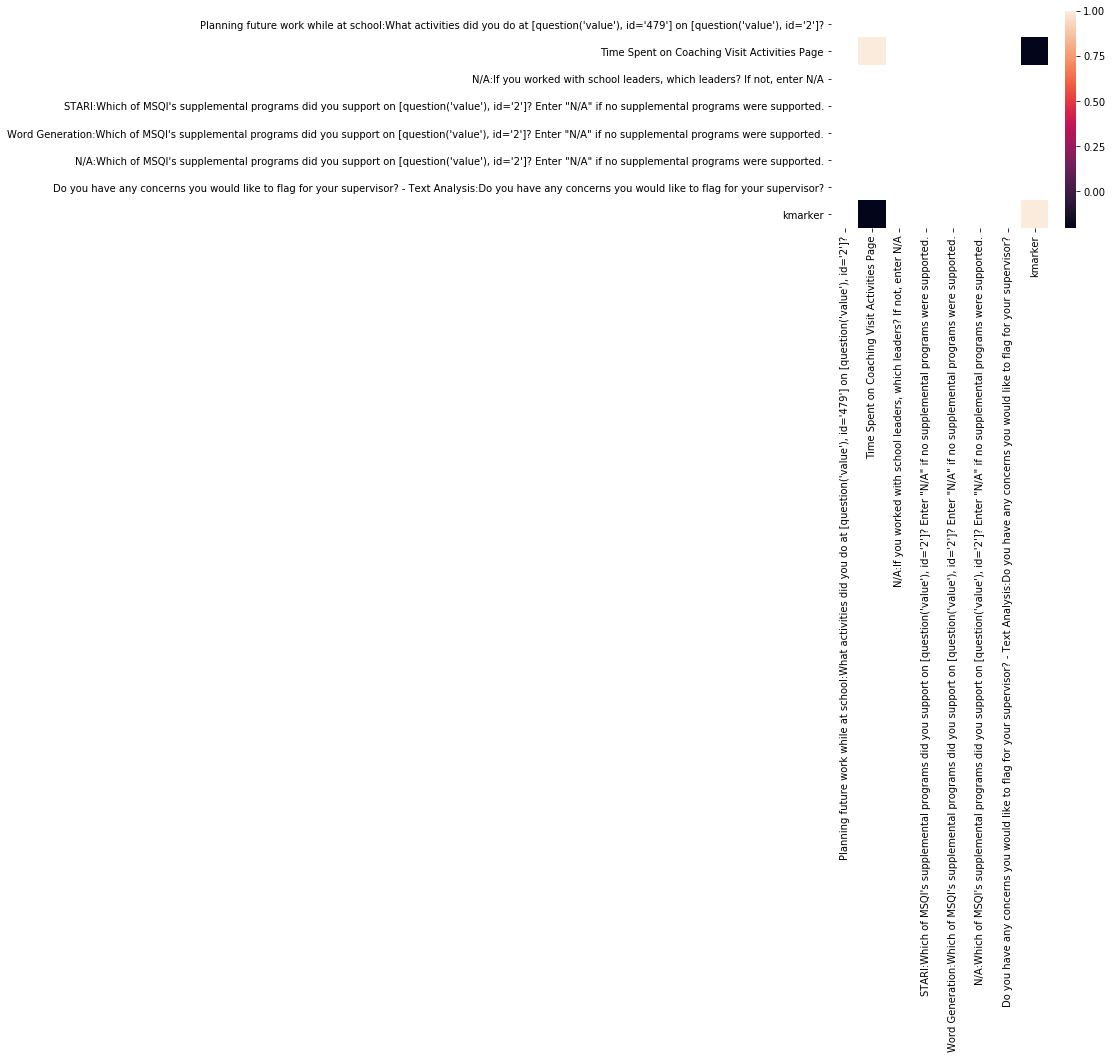

In [49]:
cor = filtered_rpsg_msqi.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

TypeError: You must first set_array for mappable

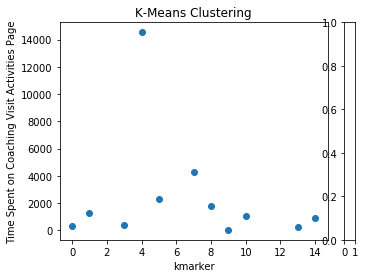

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(filtered_rpsg_msqi['kmarker'],filtered_rpsg_msqi['Time Spent on Coaching Visit Activities Page'])
ax.set_title('K-Means Clustering')
ax.set_xlabel('kmarker')
ax.set_ylabel('Time Spent on Coaching Visit Activities Page')
plt.colorbar(scatter)

In [55]:
f1 = filtered_rpsg_msqi['kmarker'].values
f2 = filtered_rpsg_msqi['Time Spent on Coaching Visit Activities Page'].values

X=np.matrix(zip(f1,f2))
kmeans = KMeans(n_clusters=2).fit(X)

TypeError: float() argument must be a string or a number, not 'zip'